In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\LSTM_alcohol sales.csv')
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
df.rename(columns = {'S4248SM144NCEN':'sales'},inplace = True)
df.head()

,DATE,sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    328 non-null    object
 1   sales   328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.7+ KB


In [8]:
df = df.set_index('DATE')
df.head()

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


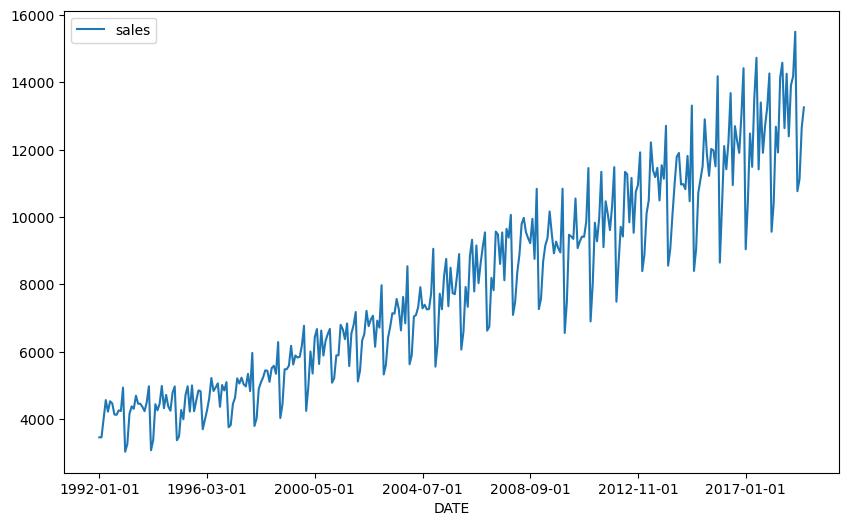

In [9]:
df.plot(figsize=(10,6))
plt.show()

In [ ]:
# as we can see that the mean is not stable it is increasing as the time increases 
# and the standard deveation also increases 
# Trend:- as we can see from the line graph is that its an up trend
# 

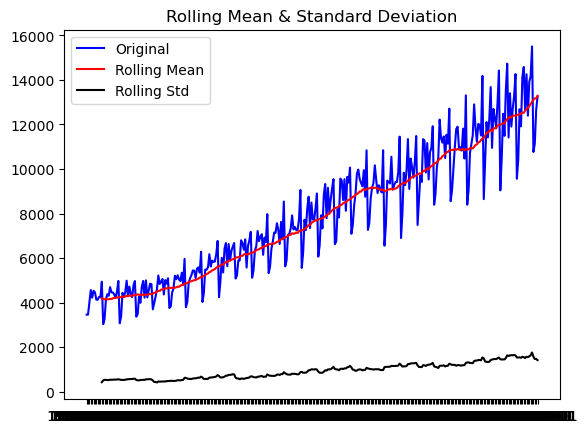

In [10]:
#determing the rolling mean and statistics
rollmean = df.rolling(window = 12).mean()
rollstd = df.rolling(window = 12).std()

#plotting the graphs
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Standardisation before applying the Model

In [12]:
#transforming the data 
#Differencing here we will take the difference between the successive values it may be 1or 2 or 3
ts_log = np.log(df['sales'])

ts_log_mv = ts_log - ts_log.shift(2)
ts_log_mv.head()
#so here we can see that the first two rows are empty because we could not take the difference

DATE
1992-01-01         NaN
1992-02-01         NaN
1992-03-01    0.145815
1992-04-01    0.277509
1992-05-01    0.053278
Name: sales, dtype: float64

In [13]:
#Removing the top null value
ts_log_mv.dropna(inplace = True)
ts_log_mv.head()
#so as we can see that there are no null values in our data

DATE
1992-03-01    0.145815
1992-04-01    0.277509
1992-05-01    0.053278
1992-06-01   -0.007698
1992-07-01    0.056421
Name: sales, dtype: float64

In [ ]:
# After standardisation plotting to see if the mean is stable or not

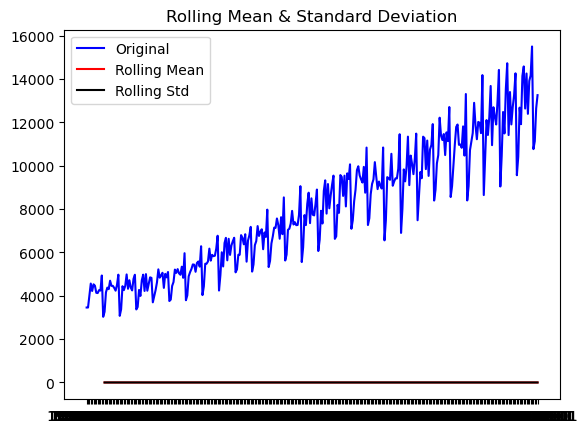

In [15]:
#determing the rolling mean and statistics
rollmean = ts_log_mv.rolling(window = 12).mean()
rollstd = ts_log_mv.rolling(window = 12).std()

#plotting the graphs
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# as we can see from the data that the mean and the standard deviation has changed and they are overlapping 
# on eachother and they got completely stable

# ARIMA MODELING 

In [16]:
# As we will be applying the ARIMA Model so we need to decide the p,q and d values 
# p-value will be decided by graph of ACf i.e(Auto-corelation fuction) which helps deciding
# the MA value (Moving Average)
# q-value will be decided by a graph of PACF (partial-Auto-corelation) which helps deciding the 
# AR (Auto-regressior)

C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


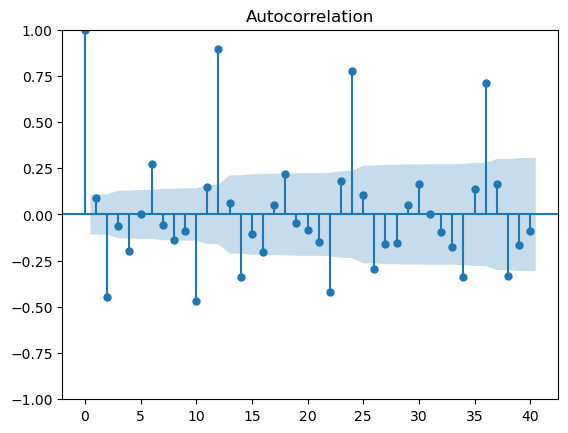

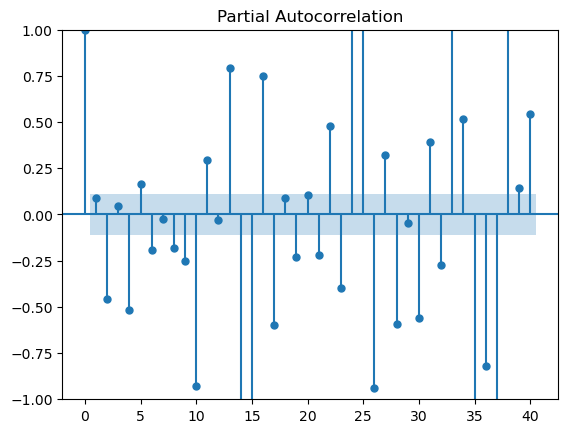

In [17]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(ts_log_mv,lags = 40)
fig = sm.graphics.tsa.plot_pacf(ts_log_mv,lags = 40)

In [18]:
#p- value that we want to get from ACf value is 2
# q value that we want to et from pacf value is 2
model = ARIMA(ts_log_mv,order = (2,2,2))

C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


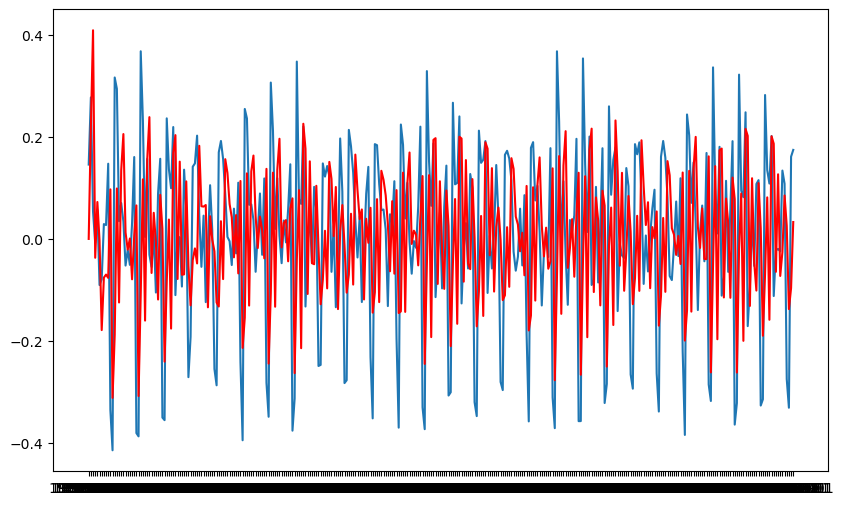

In [22]:
plt.figure(figsize=(10,6))
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_log_mv,order = (2,2,1))
result_arima = model.fit()
plt.plot(ts_log_mv)
plt.plot(result_arima.fittedvalues,color = 'red')
plt.show()

In [ ]:
#Now appling the LSTM model

In [26]:
# Spliting the data into train and test
train = df.iloc[:316]
test= df.iloc[316:]

In [30]:
test= test[0:12]
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2018-05-01 to 2019-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes


In [32]:
# bringing the data into the same format for that i am using the MIN-max scaller
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler()
sc_train = SC.fit_transform(train)
sc_test = SC.fit_transform(test)

In [24]:
from keras.models import Sequential 
from keras.layers import Dense,LSTM,Dropout
# If the model is getting over-fitted then we will be using the dropout to reduce the overfitting problem

In [35]:
model = Sequential()

In [36]:
model.add(LSTM(128,activation = 'relu', input_shape= (12, 1), return_sequences=True)) 
#Input layer with the 128 Neurons and the relu as the activation function
model.add(LSTM(128, activation='relu', return_sequences=True))
# second layer 
model.add(LSTM(128, activation='relu', return_sequences=False)) # 
model.add(Dense(1)) #this is an output layer
model.compile(optimizer='adam', loss='mse')

In [38]:
model.fit(sc_train,sc_train,epochs = 100,batch_size = 32)

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 4.7903e-05
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 4.4422e-05
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 3.8645e-05
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 3.5370e-05
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 3.3051e-05
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9272e-05
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 2.9473e-05
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 2.5679e-05
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 2.2577e-05
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 2.2348e-05
Epoch 11/100
10/10 [==============================] - 0s 8ms/step - loss: 2.1262e-05
Epoch 12/100
10/10 [==============================] - 0s 9ms/step - loss: 

10/10 [==============================] - 0s 8ms/step - loss: 9.0740e-07
Epoch 98/100
10/10 [==============================] - 0s 9ms/step - loss: 9.1215e-07
Epoch 99/100
10/10 [==============================] - 0s 8ms/step - loss: 9.3884e-07
Epoch 100/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0002e-06


In [39]:
pred = model.predict(sc_test)

1/1 [==============================] - 1s 792ms/step


In [41]:
first_eval_batch = sc_train[-12:]
first_eval_batch

array([[0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ],
       [0.63116506],
       [0.82502778],
       [0.75972305]])

In [42]:
first_eval_batch = first_eval_batch.reshape((1,12,1))

In [43]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 717ms/step


array([[74.383766]], dtype=float32)

In [46]:
#holding my predictions
test_predictions = []
# last n_input points from the training set
first_eval_batch = sc_train[-12:]
# reshape this to the format RNN wants (same format as TimeseriesGeneration)
current_batch = first_eval_batch.reshape((1,12,1))

#how far into the future will I forecast?

for i in range(len(test)):
    
    # One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    # UPDATE current batch o include prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)

1/1 [==============================] - 0s 50ms/step


In [47]:
test_predictions

[array([74.383766], dtype=float32),
 array([1357.5608], dtype=float32),
 array([25612.236], dtype=float32),
 array([491957.16], dtype=float32),
 array([9448398.], dtype=float32),
 array([1.8146078e+08], dtype=float32),
 array([3.4850348e+09], dtype=float32),
 array([6.6931634e+10], dtype=float32),
 array([1.2854515e+12], dtype=float32),
 array([2.4687663e+13], dtype=float32),
 array([4.7413738e+14], dtype=float32),
 array([9.106018e+15], dtype=float32)]

In [51]:
true_predictions = SC.inverse_transform(test_predictions)
true_predictions

array([[3.63049517e+05],
       [6.44017591e+06],
       [1.21310319e+08],
       [2.32991986e+09],
       [4.47476237e+10],
       [8.59398284e+11],
       [1.65051246e+13],
       [3.16988219e+14],
       [6.08789852e+15],
       [1.16920771e+17],
       [2.24551462e+18],
       [4.31261006e+19]])

In [52]:
test['Predictions'] =true_predictions

In [53]:
test.head()

,sales,Predictions
DATE,,
2018-05-01,14138,3.630495e+05
2018-06-01,14583,6.440176e+06
2018-07-01,12640,1.213103e+08
2018-08-01,14257,2.329920e+09
2018-09-01,12396,4.474762e+10


<AxesSubplot:xlabel='DATE'>

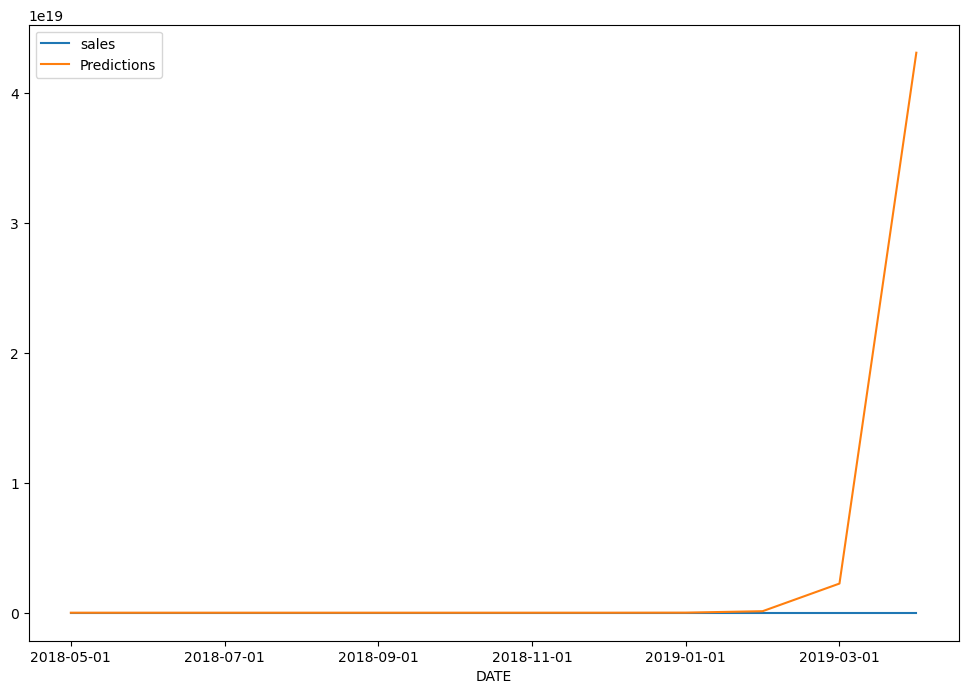

In [54]:
test.plot(figsize=(12,8))